In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

file_path = r'C:\Users\H_\Desktop\Sungmin_Github\DonggukMachineLearning\과제6\3cluster_2d_data.csv'

In [26]:
df = pd.read_csv(file_path, header = None)
df_values = df.values

df_values

array([[-0.84346198, -1.05544355, -1.27664171, -0.88032834, -0.9171947 ,
        -1.08309332, -0.58539747, -0.58539747, -1.16604263, -0.49323157,
        -0.88954493,  0.40077765,  0.45607719,  0.6311924 ,  0.99985599,
         1.12888825,  1.42381912,  1.4422523 ,  1.07358871,  0.95377304,
         0.84317396,  0.99985599, -0.30889977,  0.3546947 ,  0.31782834,
        -0.47479839, -0.25360023,  0.04133065,  0.05054724, -0.0047523 ,
        -0.1890841 , -0.8250288 , -0.78816244,  1.01828917,  0.8984735 ,
         0.66805876],
       [ 1.50530134,  1.35351562,  0.91601562,  0.6749442 ,  1.15708705,
         0.88030134,  1.18387277,  0.82672991,  0.54101562,  0.6124442 ,
         0.34458705,  1.46065848,  1.26422991,  0.74637277,  0.38922991,
         0.85351562,  1.21065848,  0.70172991,  1.26422991,  0.80887277,
         1.24637277,  1.56780134, -0.79827009, -0.78041295, -1.3250558 ,
        -1.36077009, -1.22684152, -1.53041295, -1.3250558 , -0.86969866,
        -0.53934152, -0.89648

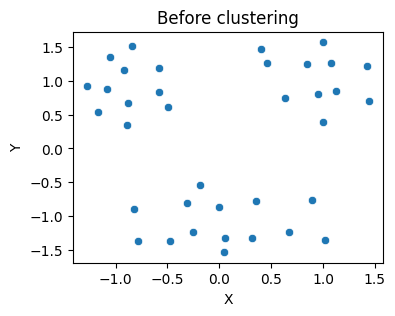

In [28]:
plt.figure(figsize = (4, 3))
sns.scatterplot(x = df_values[0], y = df_values[1])
plt.title("Before clustering")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [32]:
def k_means(data, k, max_iter=100):
    n_samples, n_features = data.shape
    
    centroids = data[np.random.choice(n_samples, k, replace=False)]
    
    labels = np.zeros(n_samples)
    
    for _ in range(max_iter):
        for i in range(n_samples):
            distances = np.linalg.norm(data[i] - centroids, axis=1)
            labels[i] = np.argmin(distances)
        
        for j in range(k):
            centroids[j] = np.mean(data[labels == j], axis=0)
    
    return labels

In [34]:
k = 3

labels = k_means(df_values.T, k)
print(labels)

각 데이터 포인트의 클러스터 할당:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


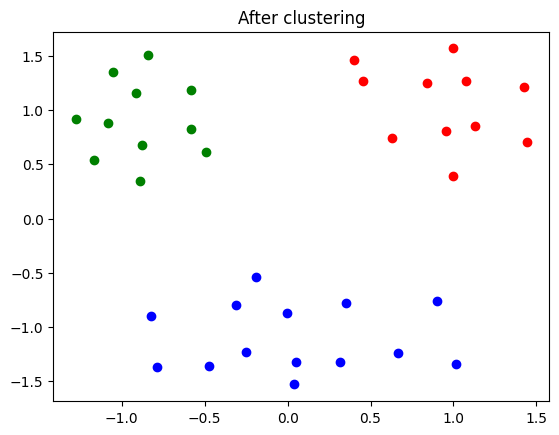

In [36]:
colors = ['r', 'g', 'b']

plt.title("After clustering")
for i in range(k):
    cluster_data = df_values.T[labels == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors[i], label=f'Cluster {i+1}')
